In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df = pd.read_excel('superstore_sales.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [55]:
#df.head()

In [56]:
#df.info()

In [57]:
#df['order_id'] = df['order_id'].astype(float)

In [58]:
#df['ship_date'] = df['ship_date'].astype(float)

In [59]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [60]:
#X=df.iloc[:,3:20] #independent coloumn
#y=df.iloc[:,-7]#target coloumn

In [61]:
#applying selectkbest class to extract features
#bestfeatures=SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(X,y)


In [62]:
#feature selection done
df = df[[  'sales','quantity','profit','shipping_cost', 'year' ]]
df

,sales,quantity,profit,shipping_cost,year
0,408.300,2,106.1400,35.460,2011
1,120.366,3,36.0360,9.720,2011
2,66.120,4,29.6400,8.170,2011
3,44.865,3,-26.0550,4.820,2011
4,113.670,5,37.7700,4.700,2011
...,...,...,...,...,...
51285,13.904,2,4.5188,0.890,2014
51286,3.990,1,0.4200,0.490,2014
51287,26.400,3,12.3600,0.350,2014
51288,7.120,1,0.5600,0.199,2014


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.scatter(df['profit'],df['sales'])

In [64]:
#plt.scatter(df['quantity'],df['sales'])

In [65]:
#plt.scatter(df['shipping_cost'],df['sales'])

In [66]:
#plt.scatter(df['sales'],df['year'])

In [67]:
X = df[['year','quantity','profit','shipping_cost']]
y = df['sales']

In [68]:
#X  #y

In [69]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [80]:
X_train


,year,quantity,profit,shipping_cost
46629,2014,3,0.8988,1.400
43381,2014,3,4.6800,4.970
807,2011,2,-50.5500,16.320
19916,2012,3,77.5800,26.748
41925,2014,4,280.4400,326.320
...,...,...,...,...
4510,2011,2,17.3488,4.360
14897,2012,1,20.7600,21.320
17441,2012,5,30.4500,21.380
48613,2014,2,16.6788,30.170


In [81]:
len(X_test)

15387

In [82]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [83]:
clf.fit(X_train,y_train)

LinearRegression()

In [84]:
clf.predict(X_test)

array([ 60.30019433,  83.28085622,  42.76805433, ..., 250.18462472,
       646.92528424, 255.5954172 ])

In [85]:
y_test

5829      12.900
48080     24.000
8024       6.714
30255    229.620
40254     48.330
          ...   
32645     62.920
10797     22.240
29887     42.120
30567    551.610
38357    377.970
Name: sales, Length: 15387, dtype: float64

In [86]:
clf.score(X_test,y_test)

0.6516028528935474

In [87]:
import math
pred_out = int(math.ceil(0.05 * len(df))) 
X_lately = X[-pred_out:]  
df.dropna(inplace=True)
y = np.array(df['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  
clf = LinearRegression(n_jobs=-1)                                         
clf.fit(X_train, y_train)                                                  
confidence = clf.score(X_test, y_test)                                    





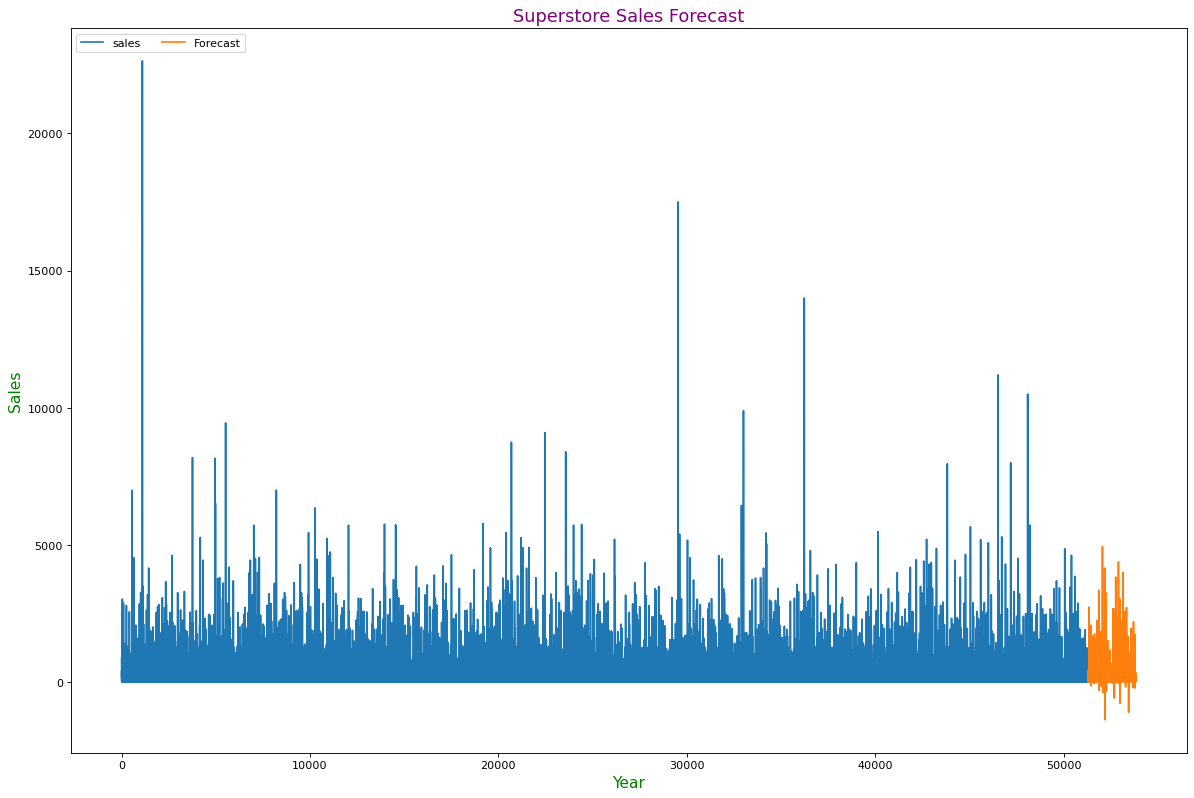

In [88]:
forecast_set = clf.predict(X_lately) # Forecasts/Predicts the future value

df['Forecast'] = np.nan

#last_date = df.iloc[-1].name

last_unix = last_date.timestamp()

one_day = 86400

next_unix = last_unix + one_day

#next_unix = last_date + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

    
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')

df['sales'].plot()

df['Forecast'].plot()
plt.legend(loc=2, ncol=2)
plt.xlabel('Year', color='green', fontsize=14, fontweight=6)
plt.ylabel('Sales', color='green', fontsize=14, fontweight=6)
plt.title('Superstore Sales Forecast', color='purple', fontsize=16, fontweight=6)
plt.show()
